# Predicting student preformance by multiple linear regression

## Installing useful library

In [40]:
!pip install -U scikit-learn

In [41]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [42]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [43]:
df=pd.read_csv('gdrive/My Drive/Student_Performance.csv')

## Data preprocessing

In [46]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].replace(['Yes', 'No'], [1, 0])
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [232]:
df.info

<bound method DataFrame.info of       Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0                 7               99                           1            9   
1                 4               82                           0            4   
2                 8               51                           1            7   
3                 5               52                           1            5   
4                 7               75                           0            8   
...             ...              ...                         ...          ...   
9995              1               49                           1            4   
9996              7               64                           1            8   
9997              6               83                           1            8   
9998              9               97                           1            7   
9999              7               74                           0            8   

      Sample Question Papers Practiced  Performance Index  
0                                    1               91.0  
1                                    2               65.0  
2                                    2               45.0  
3                                    2               36.0  
4                                    5               66.0  
...                                ...                ...  
9995                                 2               23.0  
9996                                 5               58.0  
9997                                 5               74.0  
9998                                 0               95.0  
9999                                 1               64.0  

[10000 rows x 6 columns]>

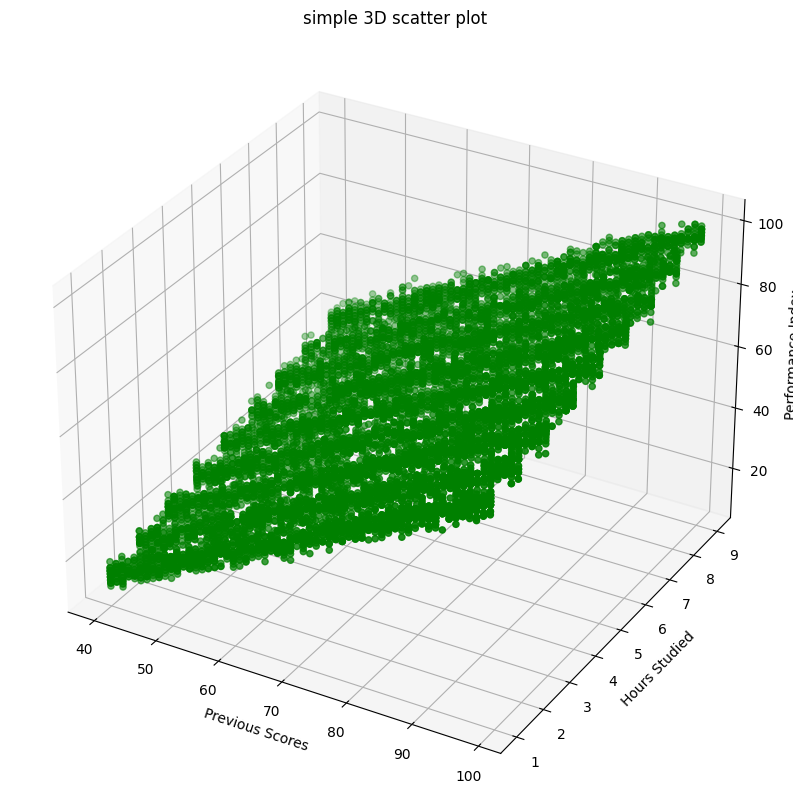

In [207]:
# 3D scatter plot
xs = 'Previous Scores'
ys = 'Hours Studied'
zs = 'Performance Index'

fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")
ax.set_xlabel(xs)
ax.set_ylabel(ys)
ax.set_zlabel(zs)

# Creating plot
ax.scatter3D(df[xs], df[ys], df[zs], color = "green")
plt.title("simple 3D scatter plot")

# show plot
plt.show()

In [208]:
X = np.asarray(df[[xs, ys]])
y = np.asarray(df[zs])

## Train test split

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (8000, 2) (8000,)
Test set: (2000, 2) (2000,)


## Modelling

In [212]:
from sklearn import linear_model
MLR = linear_model.LinearRegression()
MLR.fit(X_train, y_train)
print('Coefficients: ', MLR.coef_)

Coefficients:  [1.01993395 2.85518221]


In [213]:
y_pred = MLR.predict(X_test)
print(f"Mean Squared Error (MSE) : {np.mean((y_pred - y_test) ** 2):.2f}")
print(f'Variance score: {MLR.score(X_test, y_test):.2f}')

Mean Squared Error (MSE) : 5.15
Variance score: 0.99


In [214]:
X_test[:][1]

array([95,  8])

In [215]:
X_test[:, 0]

array([75, 95, 40, ..., 95, 72, 64])

In [216]:
X_test

array([[75,  1],
       [95,  8],
       [40,  2],
       ...,
       [95,  5],
       [72,  7],
       [64,  7]])

MAE: 1.821396797982241
RMSE: 2.2696484306248137
R2: 0.9862828542371318
Equation: y = -29.84 + 1.02x1 + 2.86x2


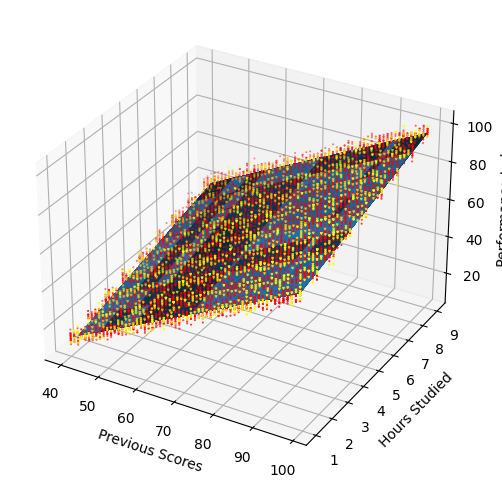

In [231]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

fig = plt.figure(figsize=(6, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, s=1, marker='.', color='red', label="Train")
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, s=1, marker='v', color='yellow', label="Test")
ax.set_xlabel(xs)
ax.set_ylabel(ys)
ax.set_zlabel(zs)

print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred)}")
print(f"R2: {r2_score(y_test, y_pred)}")

coefs = MLR.coef_
intercept = MLR.intercept_
xs_2 = X_test[:, 0]
ys_2 = X_test[:, 1]

X_mesh, y_mesh = np.meshgrid(xs_2, ys_2)

zs_2 = X_mesh * coefs[0] + y_mesh * coefs[1] + intercept

print(f"Equation: y = {intercept:.2f} + {coefs[0]:.2f}x1 + {coefs[1]:.2f}x2")

ax.plot_surface(X_mesh, y_mesh, zs_2, alpha=0.8)
plt.show()

# Version
https://www.kaggle.com/code/ivanlam7654/student-performance-multiple-linear-regression